In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

In [70]:
PATH = '/content/drive/My Drive/CSC 240 Final Project/DataSet/CorrectFinalMaskOff.csv'
df = pd.read_csv(PATH)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Tweet_id,name,id,location,text,sentiment,age,gender,date,time,race,score,screen_name,Unnamed: 0.1.1.1
0,0,0,0,1246149928143007700,Doris Kleinhenz,2756330410,NaN,"“Feds distribute thousands of masks, other sup...",Neutral,>40,Female,Apr03,18:57:49,"GreaterEuropean,WestEuropean,Germanic",0.0000,KleinhenzdDoris,NaN
1,1,1,1,1246236523835453400,Bohemian59💙🇺🇸❤️,786439079504117760,NaN,"❌Texas — yes, TEXAS city moves to fine people ...",Positive,>40,Female,Apr04,00:41:55,"GreaterAfrican,Africans",0.7269,Arteesta1959,NaN
2,2,2,2,1245987058272948200,Alvytana Mavua,78564346,Nairobi,AT_USER The first and most important is to rap...,Positive,19-29,Male,Apr03,08:10:38,"GreaterAfrican,Africans",0.1513,Mavua,NaN
3,3,3,3,1245941329651269600,killmonger'son,839285340955426821,"Tembisa, South Africa",This is horrific. Two French doctors on live t...,Negative,>40,Male,Apr03,05:08:56,"GreaterEuropean,British",-0.5892,sizwe11121,NaN
4,4,4,4,1246037533382914000,Pedro Goncalves,117716541,United Kingdom,"Aircraft carriers, navy ships, military bases ...",Negative,19-29,Male,Apr03,11:31:12,"GreaterEuropean,WestEuropean,Hispanic",-0.5463,SlowGoncalves,NaN


In [71]:
dates = []
lala = []

# March Dates
for i in range(23, 32):
  dates.append("Mar" + str(i))

# April Dates
for i in range(1, 10):
  dates.append("Apr0" + str(i))
for i in range(10, 14):
  dates.append("Apr0" + str(i))

for i in range(1, len(dates)+1):
  lala.append(i))
yolo = dict(zip(dates, lala))
print(yolo)

SyntaxError: ignored

In [72]:
print(len(yolo))

22


In [74]:
import seaborn as sns
from pandas.api.types import is_datetime64_any_dtype

#change date column to date object
for i, row in df.iterrows():
  # Convert to string
  date = str(df.at[i, 'date'])
  df.at[i, 'date'] = yolo.get(date)

# Convert to date time obj.
# df['date'] = pd.to_datetime(df['date'])
# print(is_datetime64_any_dtype(df['date']))

# Sort by date
df = df.sort_values('date')

# reset the index after sorting
df = df.reset_index(drop=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Tweet_id,name,id,location,text,sentiment,age,gender,date,time,race,score,screen_name,Unnamed: 0.1.1.1
0,53534,37703,37703,1242203112795930600,777mhallock@gmail.com,1159118074936737793,NaN,Had to go see the dentist and got caught in Ho...,Positive,30-39,Female,1,21:34:35,"GreaterAfrican,Africans",0.5499,777mhallockgma1,37703.0
1,54537,38706,38706,1242206682505261000,Cafe Pyala,891463656,NaN,Have requested CG of China Li Bijian for COVID...,Neutral,NaN,NaN,1,21:48:46,"Asian,IndianSubContinent",0.0000,CafePyala2,38706.0
2,54536,38705,38705,1242066848792928300,Dan Forest,266012753,"Raleigh, NC","Gaston County’s Parkdale Mills, one of USA’s l...",Positive,>40,Male,1,12:33:07,"Asian,GreaterEastAsian,EastAsian",0.3071,DanForestNC,38705.0
3,54535,38704,38704,1242112624323629000,Daniel Lopez,25969442,"Mostly Chicago, IL",Clothing company Hanes to produce face masks f...,Negative,30-39,Male,1,15:35:01,"GreaterEuropean,WestEuropean,Hispanic",-0.2263,4danlopez,38704.0
4,54534,38703,38703,1241977018943586300,Eim Wither 🇺🇸,785226979431723008,"San Francisco Bay Area, USA",Half a million masks to New York is not enough...,Positive,>40,Male,1,06:36:10,"GreaterEuropean,WestEuropean,Germanic",0.1280,CullTheDumb,38703.0


In [75]:
df.dtypes

Unnamed: 0            int64
Unnamed: 0.1          int64
Unnamed: 0.1.1       object
Tweet_id             object
name                 object
id                   object
location             object
text                 object
sentiment            object
age                  object
gender               object
date                 object
time                 object
race                 object
score               float64
screen_name          object
Unnamed: 0.1.1.1    float64
dtype: object

In [0]:
df['date'].value_counts()

13    18060
9     15964
12    13996
15    13321
11    13187
7     13083
14    12026
17    11398
10    11342
1     10437
8     10394
5      9295
16     9157
2      9041
18     8836
4      8408
6      8174
3      8062
Name: date, dtype: int64

In [0]:
for d in df['date'].unique():
  l = df[df['date'] == d]
  sentiments.append(l['score'].mean())
avg = pd.DataFrame(sentiments, columns = ['Average sentiment'])
avg.tail()

,Average sentiment
52,0.057072
53,-0.104431
54,-0.093311
55,0.016432
56,NaN


In [0]:
Unique = pd.Series(df['date'].unique())
Unique = pd.to_numeric(Unique, downcast='signed')
df3 = pd.concat((Unique, avg), axis = 1)
df3.head()

,0,Average sentiment
0,1.0,0.003531
1,10.0,-0.040194
2,11.0,0.001207
3,12.0,-0.039613
4,13.0,0.005291


In [0]:
df3.dtypes

0                    float64
Average sentiment    float64
dtype: object

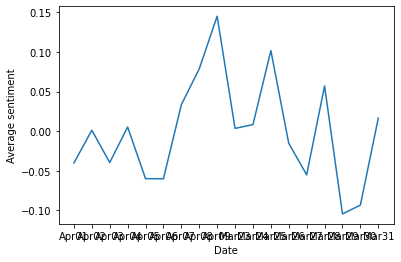

In [0]:
import seaborn as sns
plot = sns.lineplot(x = "Date", y = "Average sentiment", data = df3)

AttributeError: ignored

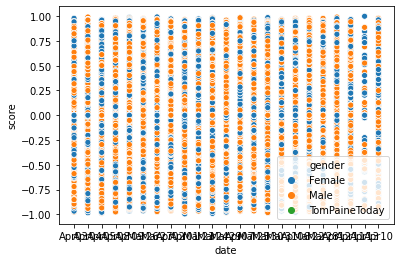

In [0]:
plot2 = sns.scatterplot(x = "date", y = "score", hue = "gender", data = df)

In [0]:
plot3 = sns.stripplot(x='date', y='score', )

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


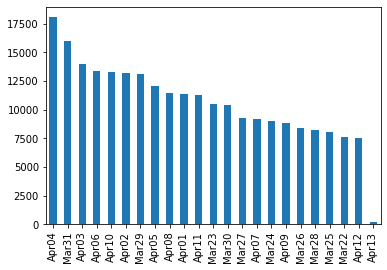

In [0]:
import matplotlib.pyplot as plt
day_order = 'Apr03', ''
ab = df['date'].value_counts()
ab2 = ab[ab != 'Apr03']
ab2.plot.bar()
plt.show()

In [0]:
# To do: order
df4 = pd.concat([df["age"], df["score"]], axis = 1)
df4.head()
sns.catplot(x = "age", y = "score", data = df4)

# Age v sentiment
# Group all sentiments by age
# Add them up


In [0]:
df5 = pd.concat([df["race"], df["score"]], axis = 1)
df5.head()
sns.catplot(x = "race", y = "score", data = df5)

In [0]:
Unique_date = df['date'].unique()  
Unique_race= df['race'].unique()   

DataFrameDate = {elem : df for elem in Unique_date}
DataFrameRace = {elem : df for elem in Unique_race}

def Sep():
    for key in DataFrameDate.keys():
            DataFrameDate[key] = df[:][df.date == key]
    for key in DataFrameRace.keys():
            DataFrameRace[key] = df[:][df.date == key]
np.mean(DataFrameDate['Mar26'].score)
Sep()
print(DataFrameDate)
print(DataFrameRace)

KeyError: ignored

In [0]:
New = {elem : df for elem in Unique_date}   #########Let DF3 be the full Datset
for item in DataFrameDate.keys():
     x= DataFrameDate[item].sort_values(by='time',ascending=True)
     
     times = pd.DatetimeIndex(x.time)
     grouped = x.groupby([times.hour])
     New[item] = grouped
     

In [0]:
New['Apr09'].score.describe()
New["Apr10"].groups.keys()


In [0]:
#%%

import numpy as np
from scipy import linalg
import matplotlib
import matplotlib.pyplot as plt
import re
import os
import json
from collections import defaultdict
from pprint import pprint
import numpy as np
import math
import pandas as pd
import progressbar

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet

# spacy
import spacy
en = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# gensim
from gensim.models import Word2Vec
import gensim

#%%

# stop words
stop_words = stopwords.words("english")
custom_stop_words = open("stop_words.txt", "r" ).readlines()
custom_stop_words = [w.strip() for w in custom_stop_words]
custom_stop_words.extend(stop_words)
# filter_words.extend(custom_stop_words)
print("Stop words list has %d entries" % len(custom_stop_words) )

#%%

# import data
data = json.load(open('covid_tweets_100000.json', 'r'))
lemmas = [d['lemma'].split(' ') for d in data]
pos_tags = [d['pos'].split(' ') for d in data]
users = [d['user'] for d in data]
texts = [d['text'] for d in data]
assert(len(lemmas[0])==len(pos_tags[0]))
print(len(lemmas))
print(len(users))

#%%

def allow_pos_tags(tag, allowed_tags):
    for t in allowed_tags:
        if tag.startswith(t):
            return True
    return False

lemmas_mod = []
for i in range(len(lemmas)):
    lemma = lemmas[i]
    pos = pos_tags[i]
    lemma_out = []
    for j in range(len(lemma)):
        if allow_pos_tags(pos[j], ['VB','NN','RB','JJ']):
            lemma_out.append(lemma[j])
    lemmas_mod.append(lemma_out)
    
keywords = ["covid", "covid_19", "coronavirus", "corona", "covid-19", "corona virus",
            "covid_19", "chinesevirus", "chinese virus", "chinese_virus", "chinese-virus", "virus"]
lemmas_mod = [[l for l in d if l not in keywords] for d in lemmas_mod]

#%%

print(len(lemmas_mod))

#%%

# compute bigrams and trigrams
print('Building bigram model ...')
bigrams = gensim.models.Phrases(lemmas_mod, min_count=5, threshold=100)
bigrams_mod = gensim.models.phrases.Phraser(bigrams)

print('Building trigram model ...')
trigrams = gensim.models.Phrases(bigrams[lemmas_mod], threshold=100)
trigrams_mod = gensim.models.phrases.Phraser(trigrams)

docs = [bigrams_mod[doc] for doc in lemmas_mod]
docs = [trigrams_mod[bigrams_mod[doc]] for doc in lemmas_mod]
docs = [' '.join(d) for d in docs]
print(len(docs))
# docs = list(filter(None, docs))
# docs = [d.split(' ') for d in docs]
print("Imported %d documents" % len(docs))

#%%

keep_idx = np.array([i for i in range(len(docs)) if docs[i]])
print(len(keep_idx))

#%%

users = np.array(users)[keep_idx]
docs = np.array(docs)[keep_idx]
texts = np.array(texts)[keep_idx]
print(len(users))

#%%

# tf-idf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, min_df=20, max_df=0.9)
A = vectorizer.fit_transform(docs)
print( "Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]))

# extract the resulting vocabulary
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

#%%

# build word embedding
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens

import gensim
docgen = TokenGenerator( docs, custom_stop_words )
# the model has 500 dimensions, the minimum document-term frequency is 20
w2v_model = gensim.models.Word2Vec(docgen, size=500, min_count=20, sg=1)
print("Model has %d terms" % len(w2v_model.wv.vocab))

# caculate coherence score
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations(term_rankings[topic_index], 2):
            pair_scores.append(w2v_model.wv.similarity(pair[0], pair[1]))
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

import numpy as np
from itertools import combinations
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

# caculate coherence score
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations(term_rankings[topic_index], 2):
            pair_scores.append(w2v_model.wv.similarity(pair[0], pair[1]))
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

#%%

from sklearn import decomposition

k_min, k_max = 55, 55
step = 1
topic_models = []
topic_weights = []
coherence_values = []

for k in range(k_min, k_max+1, step):
    print("Applying topic modeling for k=%d ..." % k)
    # model = decomposition.NMF(init="nndsvd", n_components=k)
    model = decomposition.LatentDirichletAllocation(n_components=k, 
                                                    max_iter=100, 
                                                    batch_size=512,
                                                    random_state=0,
                                                    learning_method='online')
    W = model.fit_transform(A)
    H = model.components_
    # coherence
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append(get_descriptor( terms, H, topic_index, 100) )
    coherence = calculate_coherence(w2v_model, term_rankings)
    perplexity = model.bound_
    print("K=%02d: Coherence=%.4f, Perplexity=%.4f" % ( k, coherence, perplexity ) )
    
    # store for later
    topic_models.append(model)
    topic_weights.append(W)
    coherence_values.append(coherence)

#%%

# plot coherence scores
k_values = range(k_min, k_max+1, step)
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot(k_values, coherence_values, 'b', label='Coherence')
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.show()

#%%

k_best = 0
best_model = topic_models[k_best]
topic_weight = topic_weights[k_best]
# pprint(best_model.print_topics())

#%%

import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_model, A, vectorizer, mds='PCoA')
vis

#%%

from sklearn.manifold import TSNE
print(topic_weight.shape)
# dominant topic number in each document
topic_num = np.argmax(topic_weight, axis=1)

# tSNE dimension reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(topic_weight)

#%%

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from bokeh.palettes import Dark2, Paired, Spectral, PuBuGn, YlGnBu
from collections import Counter

# plot the topic clusters using Bokeh
output_notebook()
n_topics = 6
freq = np.asarray(np.unique(topic_num, return_counts=True)).T
top_freq = np.array(sorted(freq, key=lambda x: x[1], reverse=1))[:n_topics]
print(top_freq)
top_topic_idx = top_freq[:,0]
print(top_topic_idx)
sub_idx = np.array([i for i in range(topic_num.shape[0]) if topic_num[i] in top_topic_idx])
sub_tsne_lda = tsne_lda[sub_idx,:]
sub_topic_num = topic_num[sub_idx]

colors = np.array(YlGnBu[9][:n_topics])
topic2color = dict(zip(top_topic_idx, colors))
labels = ['Global News', 'Political Discussion', 'Social Distancing', 'School Closing', 'Local News', 'China Controversy']
topic2label = dict(zip(top_topic_idx, labels))
print(topic2color)
print(topic2label)
# color_idx = np.array([topic2color[i] for i in sub_topic_num])

plot = figure(title="t-SNE Clustering of {} Most Frequent LDA Topics".format(n_topics), plot_width=900, plot_height=700)


#%%

for topic in top_topic_idx:
    topic_idx = np.array([i for i in range(sub_topic_num.shape[0]) if sub_topic_num[i]==topic])
#     print(topic_idx)
    plot.circle(x=sub_tsne_lda[topic_idx,0], 
                y=sub_tsne_lda[topic_idx,1],
                legend_label=topic2label[topic],
                color=topic2color[topic])


plot.legend.label_text_font_size = '18pt'
plot.legend.location = "bottom_right"
plot.legend.click_policy="hide"
show(plot)

#%%

print(H.shape)
print(A.shape)

#%%

def extract_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    top_counts = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
        top_counts.append(np.sum(A[:,term_index]))
    # note we reverse the ordering for the plot
#     top_terms.reverse()
#     top_weights.reverse()
    # create the plot
#     fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
#     ax = plt.barh(ypos, top_weights, align="center", color=topic2color[topic_index], alpha=1, height=0.5, tick_label=top_terms)
#     plt.xlabel("Term Weight",fontsize=14)
#     plt.xticks(rotation='vertical')
#     plt.tight_layout()
#     plt.show()
    return ypos, top_weights, top_terms, top_counts
    

# plot_top_term_weights(terms, H, 9, 20)
    
fig, axes = plt.subplots(2, 3, figsize=(24,12), sharey=True, dpi=160)
for i, ax in enumerate(axes.flatten()):
    topic_index = top_topic_idx[i]
#     print(topic_index)
    ypos, top_weights, top_terms, top_counts = extract_top_term_weights(terms, H, topic_index, 20)
    ax.bar(ypos, 
            top_weights, 
            align="center", 
            color=topic2color[topic_index], 
            width=0.4,
            tick_label=top_terms,
            label='Topic Frequency')
    ax_twin = ax.twinx()
    ax_twin.bar(ypos, 
                top_counts, 
                align="center", 
                color=topic2color[topic_index], 
                width=0.8,
                alpha=0.4,
                tick_label=top_terms,
                label='Overall Frequency')
    ax.set_title(topic2label[topic_index], color=topic2color[topic_index], fontsize=22, fontweight='bold')
    ax.set_xticklabels(top_terms, fontsize=15, rotation=35, horizontalalignment='right', fontweight='bold')
    ax.set_ylim(0, 1000)
    ax_twin.set_ylim(0, 2500)
    ax.legend(loc='upper left', prop={'size': 15})
    ax_twin.legend(loc='upper right', prop={'size': 15})
    ax_twin.grid(False)

fig.tight_layout(w_pad=1)  
# fig.suptitle('Topic-wise and Overall Frequency of Topic Keywords', fontsize=18, y=1.05)
plt.ioff()
plt.show()

#%%

print(len(topic_num))

#%%

student_users = open('college_students.txt','r').readlines()
student_users = [int(u) for u in student_users]
print(len(student_users))

#%%

non_org_users = open('covid_users_100000_non-org.jsonl','r').readlines()
non_org_users = [json.loads(u) for u in non_org_users]
non_org_users = [u['id'] for u in non_org_users]
print(len(non_org_users))

#%%

topic_data = {}
for i in top_topic_idx:
    topic_data[i] = []

#%%

for i in range(len(topic_num)):
    if topic_num[i] in top_topic_idx:
        topic_data[topic_num[i]].append((users[i],texts[i]))

#%%

total_tweet_count = []
student_tweet_count = []

for topic in top_topic_idx:
    total_tweet_count.append(len(topic_data[topic]))
    count = 0
    student_tweets = []
    general_tweets = []
    for tweet in topic_data[topic]:
        if tweet[0] in non_org_users:
            if tweet[0] in student_users:
                count += 1
                student_tweets.append(tweet[1])
            else:
                general_tweets.append(tweet[1])
            
    with open('student_tweets_{}.txt'.format(topic2label[topic].replace(' ','_')), 'w') as f:
        for t in student_tweets:
            f.write(t+'\n')
    with open('general_tweets_{}.txt'.format(topic2label[topic].replace(' ','_')), 'w') as f:
        for t in general_tweets:
            f.write(t+'\n')
        
    student_tweet_count.append(count)
    
print(total_tweet_count)
print(student_tweet_count)

#%%

# plot
student_tweet_percent = [i/j*100 for i,j in zip(student_tweet_count, total_tweet_count)]
print(student_tweet_percent)
fig, ax = plt.subplots(figsize=(10,4))

for i in range(len(top_topic_idx)):
#     ax.barh(i, 100, edgecolor='white', color=topic2color[top_topic_idx[i]], label=topic2label[top_topic_idx[i]], alpha=0.7)
    ax.barh(i, student_tweet_percent[i], color=topic2color[top_topic_idx[i]], edgecolor='white', height=0.8)
    ax.invert_yaxis()
#     ax.spines["right"].set_visible(False)
#     ax.spines["top"].set_visible(False)
ax.invert_yaxis()
plt.yticks(range(6), labels, fontsize=15, horizontalalignment='right', fontweight='bold')
plt.xticks(5*np.array(range(8)), fontsize=12)
plt.xlabel('Percentage of Student Tweets', fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.title("Contributions of Student Tweets Per Topic", fontsize=20)

#%%

topic = 38
topic_sentiments = open('student_sentiments_{}.txt'.format(topic2label[topic].replace(' ','_')), 'r').readlines()
topic_sentiments = [int(s) for s in topic_sentiments]
print(len(topic_sentiments))

topic_docs = []

for i in range(len(topic_num)):
    if topic_num[i] == topic and users[i] in student_users:
        topic_docs.append(docs[i])
        
print(len(topic_docs))

#%%

topic_docs = [topic_docs[i] for i in range(len(topic_docs)) if topic_sentiments[i] in [0,2]]
topic_sentiments = [s for s in topic_sentiments if s in [0,2]]

#%%

print(len(topic_docs))
print(len(topic_sentiments))

#%%

# tf-idf vectorization
sub_vectorizer = TfidfVectorizer(stop_words=custom_stop_words, min_df=5, max_df=0.9)
sub_A = sub_vectorizer.fit_transform(topic_docs)
print( "Created %d X %d TF-IDF-normalized document-term matrix" % (sub_A.shape[0], sub_A.shape[1]))

# extract the resulting vocabulary
sub_terms = sub_vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(sub_terms))

#%%

sub_docgen = TokenGenerator( topic_docs, custom_stop_words )
# the model has 500 dimensions, the minimum document-term frequency is 20
sub_w2v_model = gensim.models.Word2Vec(sub_docgen, size=500, min_count=5, sg=1)
print("Model has %d terms" % len(sub_w2v_model.wv.vocab))

#%%

k_min, k_max = 3, 3
step = 1
sub_topic_models = []
sub_topic_weights = []
sub_coherence_values = []

for k in range(k_min, k_max+1, step):
    print("Applying topic modeling for k=%d ..." % k)
    # model = decomposition.NMF(init="nndsvd", n_components=k)
    sub_model = decomposition.LatentDirichletAllocation(n_components=k, 
                                                    max_iter=100, 
                                                    batch_size=16,
                                                    random_state=0,
                                                    learning_method='online')
    sub_W = sub_model.fit_transform(sub_A)
    sub_H = sub_model.components_
    # coherence
    sub_term_rankings = []
    for topic_index in range(k):
        sub_term_rankings.append(get_descriptor( sub_terms, sub_H, topic_index, 20) )
    coherence = calculate_coherence(sub_w2v_model, sub_term_rankings)
    perplexity = sub_model.bound_
    print("K=%02d: Coherence=%.4f, Perplexity=%.4f" % ( k, coherence, perplexity ) )
    
    # store for later
    sub_topic_models.append(sub_model)
    sub_topic_weights.append(sub_W)
    sub_coherence_values.append(coherence)

#%%

sub_k_best = 0
best_sub_model = sub_topic_models[sub_k_best]
sub_topic_weight = sub_topic_weights[sub_k_best]


import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_sub_model, sub_A, sub_vectorizer, mds='PCoA')
vis

#%%

# dominant topic number in each document
sub_topic_num = np.argmax(sub_topic_weight, axis=1)

#%%

sub_freq = np.asarray(np.unique(sub_topic_num, return_counts=True)).T
sub_top_freq = np.array(sorted(sub_freq, key=lambda x: x[1], reverse=1))
print(sub_top_freq)

#%%

_, _, sub_top_terms, _ = extract_top_term_weights(sub_terms, sub_H, 0, 20)
print(sub_top_terms)

#%%

sub_freq = np.asarray(np.unique(topic_sentiments, return_counts=True)).T
sub_top_freq = np.array(sorted(sub_freq, key=lambda x: x[1], reverse=1))
print(sub_top_freq)

#%%

count = 0
for i in range(len(sub_topic_num)):
    if sub_topic_num[i]==1 and topic_sentiments[i] == 0:
        count += 1
               
print(count)

#%%


